# **Project Description: Flood Hazard Index Classification for Vulnerability Assessment**
This project aims to quantify and classify flood hazard levels across districts using data extracted from the Flood Hazard Atlas of Uttar Pradesh. The core problem addressed is the lack of structured, interpretable flood risk data that can be directly used for vulnerability modeling and policy planning.

Flood hazard is assessed using a composite index (H × A × F), representing hazard intensity, affected area, and flood frequency. However, the raw data is fragmented across PDF tables and lacks categorical interpretation. To solve this, we:

**--> Extracted and cleaned district-level flood data from complex PDF sources**

**--> Calculated the Flood Hazard Index (FHI) for each district**

**--> Classified FHI values into five hazard categories (Very Low to Very High) based on official thresholds**

**--> Created a clean, mentor-friendly dataset with both numeric and categorical indicators**

This structured dataset lays the foundation for merging with demographic and infrastructure data, enabling deeper analysis of flood vulnerability and resilience across regions.

**1. Install Required Libraries**

In [3]:
# Install tabula-py and Java (required for PDF table extraction)
!pip install tabula-py
!apt-get install -y openjdk-11-jre-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 76.5 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
openjdk-11-jre-headless is already the newest version (11.0.28+6-1ubuntu1~22.04.1).
openjdk-11-jre-headless set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


**2. Upload Your PDF for data extraction**

In [4]:
from google.colab import files

# Upload the PDF file manually
uploaded = files.upload()

# Get the filename
pdf_file = list(uploaded.keys())[0]
print("Uploaded file:", pdf_file)

Saving Flood Hazard Atlas of Uttar Pradesh.pdf to Flood Hazard Atlas of Uttar Pradesh.pdf
Uploaded file: Flood Hazard Atlas of Uttar Pradesh.pdf


**3. Extract Tables from the PDF**

In [5]:
import tabula
import pandas as pd
import os

# Set Java path for tabula
os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-11-openjdk-amd64'

# Extract tables from all pages
tables = tabula.read_pdf(pdf_file, pages='65-66', multiple_tables=True)

# Check how many tables were found
print("Total tables extracted:", len(tables))

Sep 07, 2025 3:53:30 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Sep 07, 2025 3:53:30 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>



Total tables extracted: 3


**4: Preview and Select Useful Tables**

In [6]:
# Preview each table
for i, table in enumerate(tables):
    print(f"\nTable {i}")
    print(table.head())


Table 0
         Unnamed: 0  FLOOD HAZARD ATLAS  Unnamed: 1
0  OF UTTAR PRADESH                 NaN         NaN

Table 1
  Unnamed: 0  Unnamed: 1     Unnamed: 2      Unnamed: 3 Unnamed: 4  \
0        NaN         NaN    Total Flood             NaN      Index   
1        NaN         NaN  District Area             NaN        NaN   
2        NaN    District            NaN  Inundated Area       FHI=   
3        NaN  (Hectares)    Hazard Area             NaN        NaN   
4        NaN  (Hectares)  Σ (Hw*Aw) * Σ             NaN        NaN   

  Flood Hazard  Unnamed: 5  
0          NaN         NaN  
1      % Flood         NaN  
2          NaN         NaN  
3          NaN         NaN  
4          NaN         NaN  

Table 2
  Unnamed: 0     Unnamed: 1      Unnamed: 2   Unnamed: 3   Flood Hazard
0        NaN            NaN     Total Flood          NaN          Index
1        NaN  District Area             NaN      % Flood            NaN
2   District            NaN  Inundated Area          NaN  

As here , Table 1 and 2 are the same table in the PDf but due having them on two different pages cause the formation of 2 tables so we combine both the tables.

In [7]:
print(tables[1].head(10))
print(tables[2].head(10))

    Unnamed: 0  Unnamed: 1     Unnamed: 2      Unnamed: 3 Unnamed: 4  \
0          NaN         NaN    Total Flood             NaN      Index   
1          NaN         NaN  District Area             NaN        NaN   
2          NaN    District            NaN  Inundated Area       FHI=   
3          NaN  (Hectares)    Hazard Area             NaN        NaN   
4          NaN  (Hectares)  Σ (Hw*Aw) * Σ             NaN        NaN   
5          NaN         NaN            NaN             NaN        NaN   
6          NaN         NaN        (IAVw))             NaN        NaN   
7       Ballia      298100         114548              38        108   
8     Azamgarh      405400         131592              32        102   
9  Maharajganj      295200         118227              40        102   

  Flood Hazard  Unnamed: 5  
0          NaN         NaN  
1      % Flood         NaN  
2          NaN         NaN  
3          NaN         NaN  
4          NaN         NaN  
5          NaN         NaN  
6   

As, we see above table 1 has some irrelvant data from row 0 to 6 and same for row 2 from row 0 to 5 so we need to clean this first.

In [8]:
table1_clean = tables[1].iloc[7:].reset_index(drop=True)
table2_clean = tables[2].iloc[6:].reset_index(drop=True)

In [9]:
table1_clean.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Flood Hazard,Unnamed: 5
0,Ballia,298100,114548,38,108,NaN,NaN
1,Azamgarh,405400,131592,32,102,NaN,NaN
2,Maharajganj,295200,118227,40,102,NaN,NaN
3,Ghazipur,337700,117697,35,102,NaN,NaN
4,Budaun,425954,88762,21,102,NaN,NaN


In [10]:
table2_clean.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Flood Hazard
0,Sultanpur,244271,12969,5,15
1,Firozabad,236200,7316,3,15
2,Kaushambi,178000,5732,3,15
3,Agra,402700,5346,1,15
4,Chitrakoot,316400,5114,2,15


In [11]:
print(tables[1].columns.tolist())
print(tables[2].columns.tolist())

['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Flood Hazard', 'Unnamed: 5']
['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Flood Hazard']


Since table 1 and table 2 has different table names and tables 1 has some extra columns. so, we need to remove the extra columns because the contain only NaN value and not much more important. And due to having the fragment of same table both tables should have the same column header.

In [12]:
table1_clean.dropna(axis=1, how='all', inplace=True)

In [13]:
print(table1_clean.columns.tolist())

['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']


In [14]:
correct_headers = [
    'District',
    'Total_Flood_Area_Ha',
    'Inundated_Area_Ha',
    'Flood_Hazard_Pct',
    'Flood_Hazard_Index'
]

table1_clean.columns = correct_headers
table2_clean.columns = correct_headers


In [15]:
print(table1_clean.columns.tolist())
print(table2_clean.columns.tolist())

['District', 'Total_Flood_Area_Ha', 'Inundated_Area_Ha', 'Flood_Hazard_Pct', 'Flood_Hazard_Index']
['District', 'Total_Flood_Area_Ha', 'Inundated_Area_Ha', 'Flood_Hazard_Pct', 'Flood_Hazard_Index']


In [16]:
combined_df = pd.concat([table1_clean, table2_clean], ignore_index=True)

In [17]:
combined_df.head()

,District,Total_Flood_Area_Ha,Inundated_Area_Ha,Flood_Hazard_Pct,Flood_Hazard_Index
0,Ballia,298100,114548,38,108
1,Azamgarh,405400,131592,32,102
2,Maharajganj,295200,118227,40,102
3,Ghazipur,337700,117697,35,102
4,Budaun,425954,88762,21,102


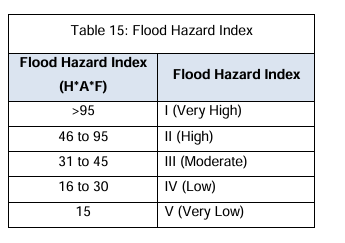




As in the picture we have to make an another column to denote the flood hazard index. so, that it will help us in classfication for the flood area more prominently and optimistically.

In [18]:
# Convert to numeric, coercing errors to NaN
combined_df['Flood_Hazard_Index'] = pd.to_numeric(combined_df['Flood_Hazard_Index'], errors='coerce')

In [19]:
def classify_fhi(fhi):
    if fhi > 95:
        return 'Very High'
    elif 46 <= fhi <= 95:
        return 'High'
    elif 31 <= fhi <= 45:
        return 'Moderate'
    elif 16 <= fhi <= 30:
        return 'Low'
    elif fhi <= 15:
        return 'Very Low'
    else:
        return 'Unknown'

combined_df['Flood_Hazard_Category'] = combined_df['Flood_Hazard_Index'].apply(classify_fhi)


In [20]:
combined_df.head()

,District,Total_Flood_Area_Ha,Inundated_Area_Ha,Flood_Hazard_Pct,Flood_Hazard_Index,Flood_Hazard_Category
0,Ballia,298100,114548,38,108,Very High
1,Azamgarh,405400,131592,32,102,Very High
2,Maharajganj,295200,118227,40,102,Very High
3,Ghazipur,337700,117697,35,102,Very High
4,Budaun,425954,88762,21,102,Very High


Now , we get the clean Dataset for our ML model. So we save the datasets for the precaution ( In case we lost some data due to error we can use this dataset to recover).

In [21]:
combined_df.to_csv('New_cleaned_flood_data.csv', index=False)

**Downloading the Dataset**

In [22]:
from google.colab import files
files.download('New_cleaned_flood_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **WEEK - 2**

**EDA**

In [23]:
combined_df.info()
combined_df.describe()
combined_df['Flood_Hazard_Category'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   District               72 non-null     object
 1   Total_Flood_Area_Ha    72 non-null     object
 2   Inundated_Area_Ha      72 non-null     object
 3   Flood_Hazard_Pct       72 non-null     object
 4   Flood_Hazard_Index     72 non-null     int64 
 5   Flood_Hazard_Category  72 non-null     object
dtypes: int64(1), object(5)
memory usage: 3.5+ KB


,count
Flood_Hazard_Category,
Very Low,29
Low,12
Very High,11
High,11
Moderate,9


Text(0.5, 1.0, 'Flood Hazard Category Frequency')

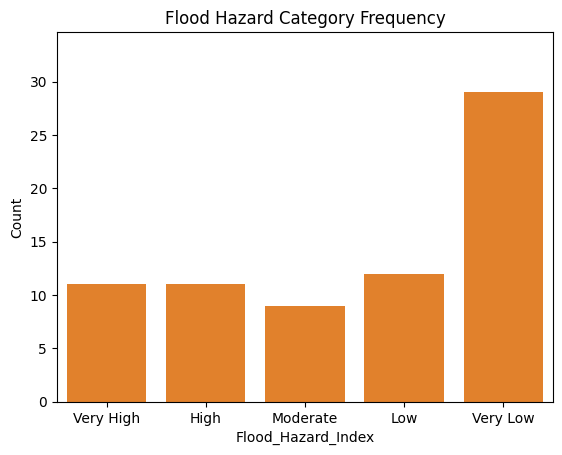

In [24]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Flood Hazard Index
sns.histplot(combined_df['Flood_Hazard_Index'], kde=True)
plt.title("Flood Hazard Index Distribution")

# Category frequency
sns.countplot(x='Flood_Hazard_Category', data=combined_df)
plt.title("Flood Hazard Category Frequency")

In [25]:
print("Missing values:\n", combined_df.isnull().sum())
print("Duplicate rows:", combined_df.duplicated().sum())

Missing values:
 District                 0
Total_Flood_Area_Ha      0
Inundated_Area_Ha        0
Flood_Hazard_Pct         0
Flood_Hazard_Index       0
Flood_Hazard_Category    0
dtype: int64
Duplicate rows: 0


In [26]:
# Data Transformation
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_scale = ['Flood_Hazard_Index', 'Total_Flood_Area_Ha', 'Inundated_Area_Ha']

combined_df[[col + '_Norm' for col in cols_to_scale]] = scaler.fit_transform(combined_df[cols_to_scale])


In [27]:
combined_df['Flood_Hazard_Code'] = combined_df['Flood_Hazard_Category'].astype('category').cat.codes

In [28]:
category_mapping = dict(enumerate(combined_df['Flood_Hazard_Category'].astype('category').cat.categories))
print("Category Mapping:", category_mapping)

Category Mapping: {0: 'High', 1: 'Low', 2: 'Moderate', 3: 'Very High', 4: 'Very Low'}


In [33]:
combined_df.head()

,District,Total_Flood_Area_Ha,Inundated_Area_Ha,Flood_Hazard_Pct,Flood_Hazard_Index,Flood_Hazard_Category,Flood_Hazard_Index_Norm,Total_Flood_Area_Ha_Norm,Inundated_Area_Ha_Norm,Flood_Hazard_Code
0,Ballia,298100,114548,38,108,Very High,1.000000,0.294974,0.632461,3
1,Azamgarh,405400,131592,32,102,Very High,0.935484,0.455964,0.726599,3
2,Maharajganj,295200,118227,40,102,Very High,0.935484,0.290623,0.652781,3
3,Ghazipur,337700,117697,35,102,Very High,0.935484,0.354389,0.649854,3
4,Budaun,425954,88762,21,102,Very High,0.935484,0.486803,0.490039,3


In [34]:
combined_df.describe(include='all')

,District,Total_Flood_Area_Ha,Inundated_Area_Ha,Flood_Hazard_Pct,Flood_Hazard_Index,Flood_Hazard_Category,Flood_Hazard_Index_Norm,Total_Flood_Area_Ha_Norm,Inundated_Area_Ha_Norm,Flood_Hazard_Code
count,72,72,72,72,72.000000,72,72.000000,72.000000,72.000000,72.000000
unique,72,72,72,30,NaN,5,NaN,NaN,NaN,NaN
top,Ballia,298100,114548,2,NaN,Very Low,NaN,NaN,NaN,NaN
freq,1,1,1,6,NaN,29,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,43.638889,NaN,0.307945,0.326948,0.208499,2.486111
std,NaN,NaN,NaN,NaN,34.815937,NaN,0.374365,0.190723,0.224669,1.528997
min,NaN,NaN,NaN,NaN,15.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,15.000000,NaN,0.000000,0.198837,0.040271,1.000000
50%,NaN,NaN,NaN,NaN,30.000000,NaN,0.161290,0.297974,0.116223,3.000000
75%,NaN,NaN,NaN,NaN,90.000000,NaN,0.806452,0.455401,0.314152,4.000000


Text(0.5, 1.0, 'Feature Correlation Matrix')

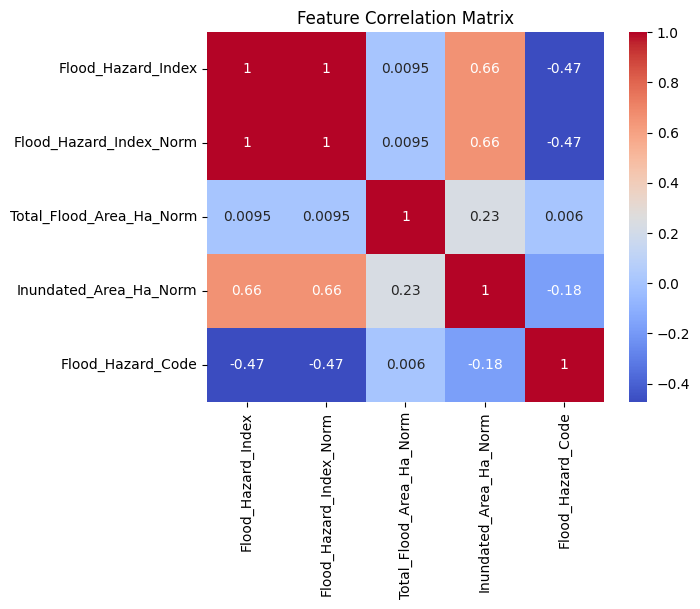

In [35]:
# feature selection

# Select numeric features
numeric_cols = combined_df.select_dtypes(include='number').columns

# Plot correlation heatmap
sns.heatmap(combined_df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")

Text(0.5, 1.0, 'Feature Importance for Hazard Category')

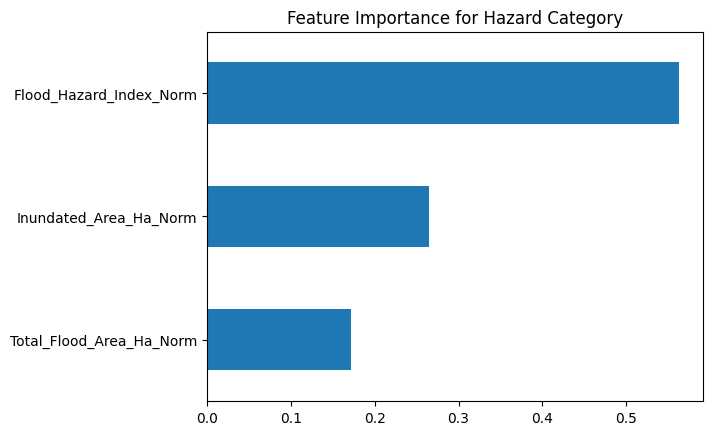

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Define features and target
X = combined_df[['Flood_Hazard_Index_Norm', 'Total_Flood_Area_Ha_Norm', 'Inundated_Area_Ha_Norm']]
y = combined_df['Flood_Hazard_Code']

# Fit model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Plot feature importance
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.sort_values().plot(kind='barh')
plt.title("Feature Importance for Hazard Category")

/tmp/ipython-input-2892513922.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Flood_Hazard_Category', data=combined_df, palette='Set2')


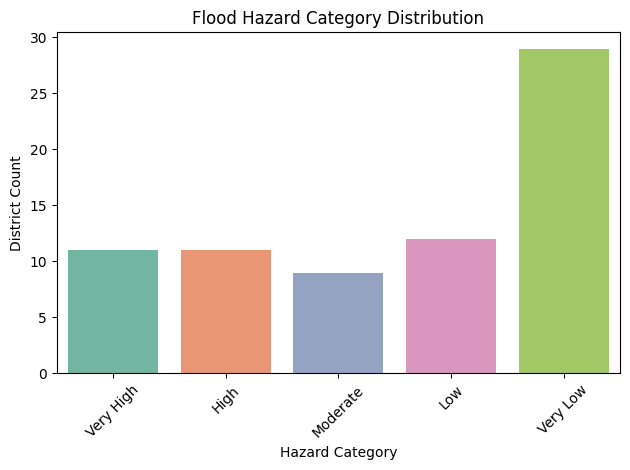

In [37]:
# Flood Hazard Category Distribution

sns.countplot(x='Flood_Hazard_Category', data=combined_df, palette='Set2')
plt.title("Flood Hazard Category Distribution")
plt.xlabel("Hazard Category")
plt.ylabel("District Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-932233522.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Flood_Hazard_Index', y='District', data=top10_index, palette='Reds_r')


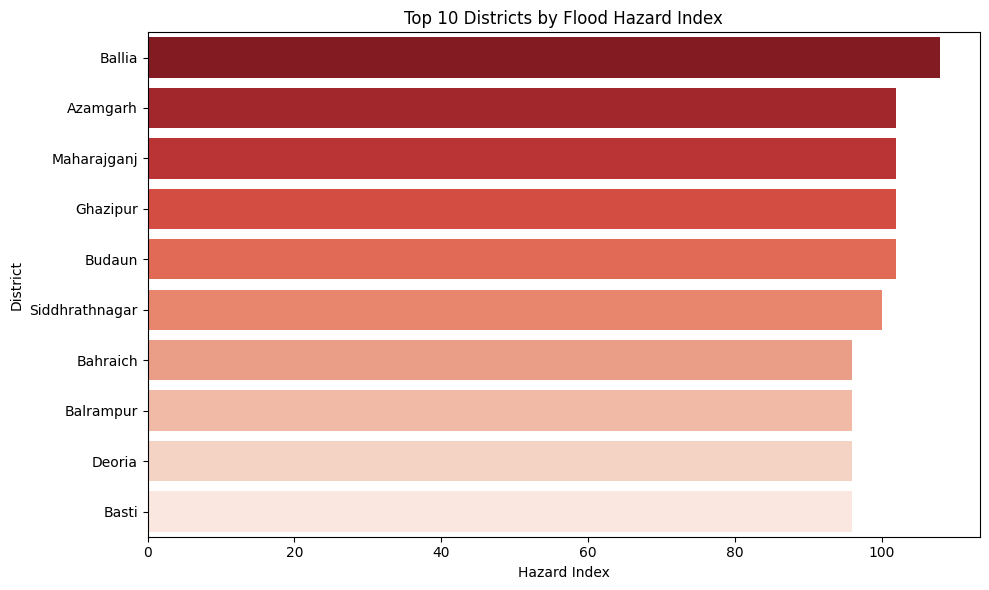

In [38]:
top10_index = combined_df.sort_values(by='Flood_Hazard_Index', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Flood_Hazard_Index', y='District', data=top10_index, palette='Reds_r')
plt.title("Top 10 Districts by Flood Hazard Index")
plt.xlabel("Hazard Index")
plt.ylabel("District")
plt.tight_layout()
plt.show()

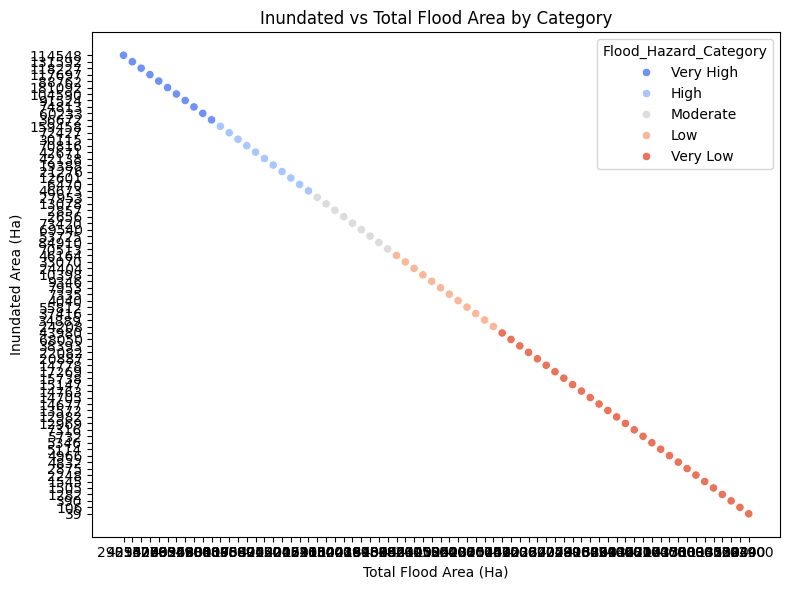

In [47]:
import matplotlib.ticker as ticker


plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Total_Flood_Area_Ha',
    y='Inundated_Area_Ha',
    hue='Flood_Hazard_Category',
    data=combined_df,
    palette='coolwarm'
)
plt.title("Inundated vs Total Flood Area by Category")
plt.xlabel("Total Flood Area (Ha)")
plt.ylabel("Inundated Area (Ha)")
plt.tight_layout()
plt.show()

